# Titanik Veri Seti EDA

Öncelikle gerekli kütüphaneleri yüklüyoruz

In [3]:
#importlar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Daha sonra csv dosyasındaki verileri **df** adlı dataframe'e yüklüyoruz.

In [4]:
# ilk olarak .csv dosyasından verileri yüklüyoruz
df = pd.read_csv("Data/titanic/train.csv")

Öncelikle **df.head()** fonksiyonuyla veri setinin ilk 5 satırını çağırıp veri hakkında genel bir fikir oluşturuyoruz.

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**df.info()** metoduyla her bir özelliğin veri tipini analiz ediyoruz.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**df.describe()** metoduyla her bir sütundaki verilerin ortalama,min ve max değerleri gibi özelliklerini görüntülüyoruz

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Hangi sütunlarda ne kadar kayıp veri olduğunu görmek için **df.isnull().sum()** fonksiyonunu kullanıyoruz.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'*Age*' ve '*Fare*' sütunlarındaki verilerde aykırı değerler olma ihtimali yüksek olduğu için **Boxplot** yardımıyla aykırı değerlerin dağılımını inceliyoruz

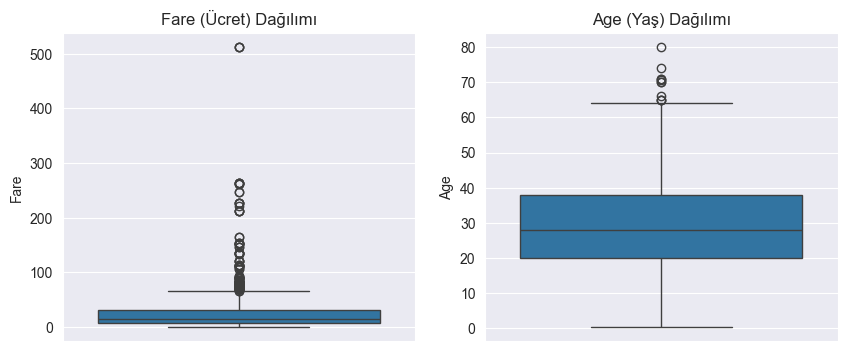

In [9]:
plt.figure(figsize=(10, 4))

# Fare (Ücret) için Kutu Grafiği
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Fare')
plt.title('Fare (Ücret) Dağılımı')

# Age (Yaş) için Kutu Grafiği
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Age')
plt.title('Age (Yaş) Dağılımı')

plt.show()

Veri hakkında daha fazla fikrimizin olması için **'Sex','Pclass', ve 'Embarked'** özelliklerinin dağılımını inceliyoruz.

<Axes: xlabel='count', ylabel='Sex'>

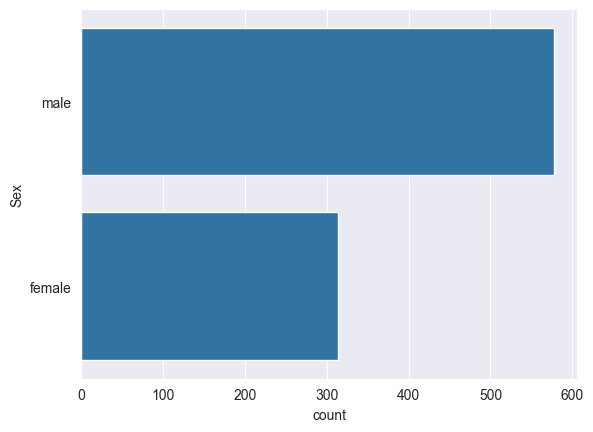

In [10]:
sns.countplot(data=df,y='Sex')

<Axes: xlabel='count', ylabel='Pclass'>

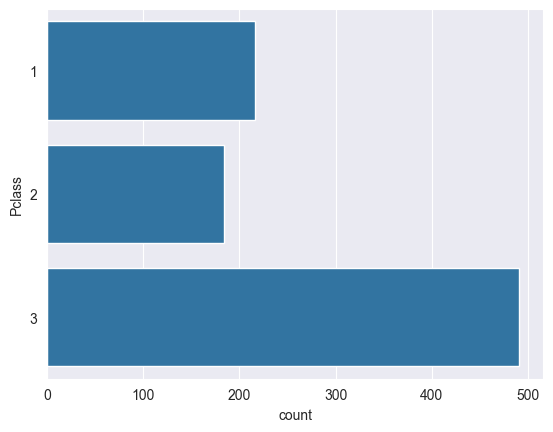

In [11]:
sns.countplot(data=df,y='Pclass')

<Axes: xlabel='count', ylabel='Embarked'>

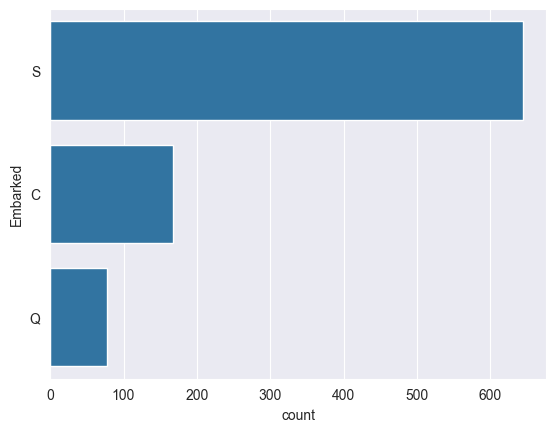

In [12]:
sns.countplot(data=df,y='Embarked')

<Axes: xlabel='count', ylabel='Survived'>

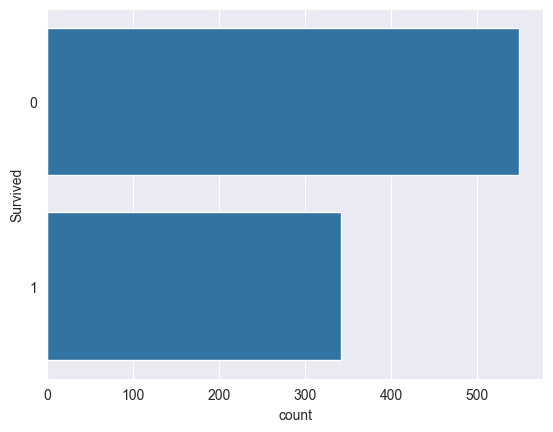

In [13]:
sns.countplot(data=df,y='Survived')

Ardından **'Sex','Pclass', ve 'Embarked'** özelliklerinin hayatta kalma durumuyla ilişkisini incelemek istiyoruz. Bu yüzden **countplot**lara başvuruyoruz.

<Axes: xlabel='Pclass', ylabel='count'>

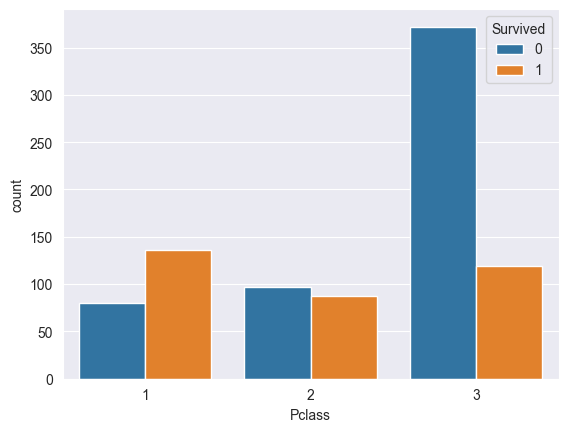

In [14]:
sns.countplot(data=df, x='Pclass', hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

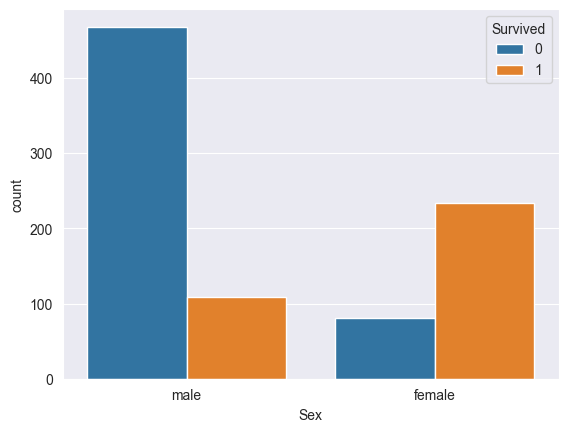

In [15]:
sns.countplot(data=df, x='Sex', hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

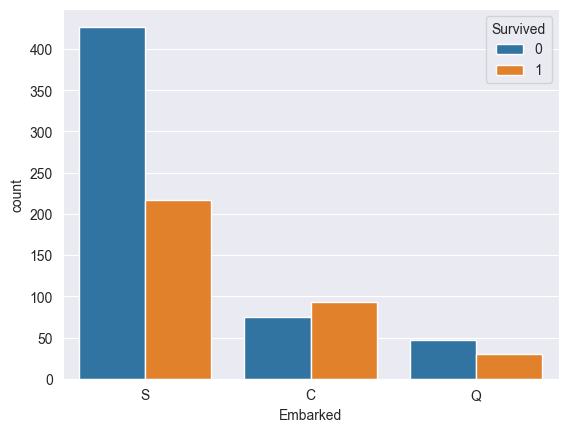

In [16]:
sns.countplot(data=df, x='Embarked', hue='Survived')

Modelin ihtiyaçlarından biri olan "Multicollinearity" (Çoklu Doğrusal Bağlantı) problemini tespit etmek için özelliklerin birbiriyle olan ilişkisini inceliyoruz.

Bunun için `main.py` dosyasında tüm ön işlemeden (missing values, outlier handling, feature engineering) geçmiş olan son veriyi (`data`) import ederek bir ısı haritası (heatmap) çizeceğiz.

Bu harita, hangi özelliklerin birbiriyle güçlü ilişkiye sahip olduğunu ve hangi özelliklerin hedef değişkenimiz olan `Survived` ile en ilişkili olduğunu gösterecektir.


Aykırı değer yönetimi başlıyor...
'Fare' için Aykırı Değer Sınırları: Alt=-26.72, Üst=65.63
'Age' için Aykırı Değer Sınırları: Alt=-0.50, Üst=59.50
Aykırı değer yönetimi tamamlandı.



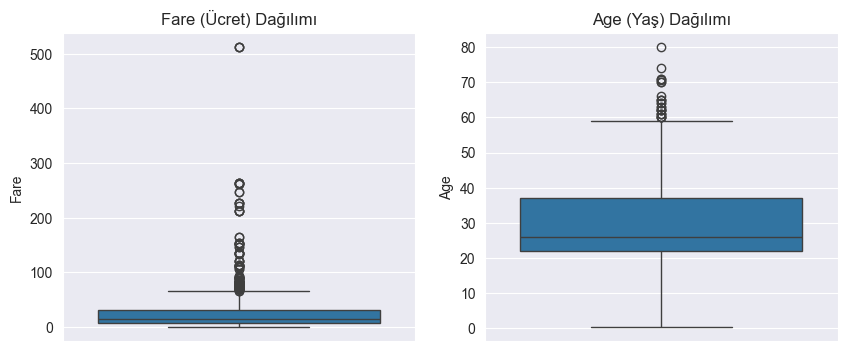

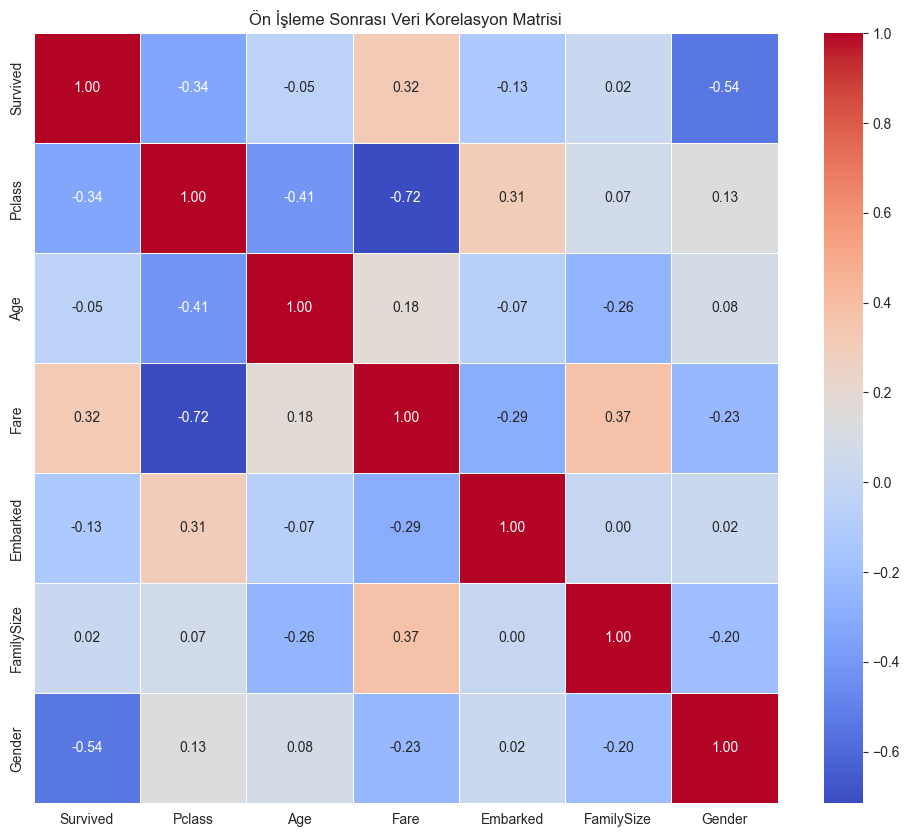

In [17]:
from main import get_data

# get_data() fonksiyonunu çağırarak işlenmiş veriyi alalım
final_data = get_data()

# Korelasyon matrisini hesapla
corr_matrix = final_data.corr()

# Isı haritasını (heatmap) çizdir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ön İşleme Sonrası Veri Korelasyon Matrisi')
plt.show()

### Korelasyon Yorumu

- **Survived (Hedef Değişken):** `Survived` satırına/sütununa baktığımızda, `Gender` (Cinsiyet, 0:kadın, 1:erkek) ile güçlü bir negatif korelasyon (-0.54) görüyoruz. Bu, kadınların hayatta kalma olasılığının daha yüksek olduğunu gösterir. `Pclass` (Sınıf) ile de negatif bir ilişki (-0.34) var; sınıf düştükçe (1'den 3'e) hayatta kalma olasılığı azalıyor.
